<h1 style="text-align:center">Mushroom Analysis and Prediction</h1>
<h6 style="text-align:center">The contents of this notebook were developed following crisp-DM standard</h6>

<img src="https://s3-us-west-2.amazonaws.com/myed-prod/books/1421/docbook/resources/images/CRISP-DM.png" style="height:400px; display: block; margin: auto;">


#

# Business Understanding

<h3>The following analysis and modelling was conducted on top of a Dataset from one of the UCI Machine Learning repositories.</h3>

### Description from the original source https://archive.ics.uci.edu/dataset/73/mushroom :
<h3>"This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525).  Each species is identified as definitely edible or definitely poisonous, or of unknown edibility and not recommended.  This latter class was combined with the poisonous one.  The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like ``leaflets three, let it be'' for Poisonous Oak and Ivy."</h3>
<h3>In general, the terms used in the Dataset are very straightforward, with no in-depth knowledge required in order to understand them individually as they are directly related to physical characteristics of the mushrooms.  I have previously changed the naming of the categories under each feature for better understanding.</h3>
<h3>The main goal of this project is to perform an in-depth analysis of the problem in order to facilitate the development of a model that can most optimally predict whether a mushroom is poisonous or edible, based on the several features presented.</h3>

### https://archive.ics.uci.edu/dataset/73/mushroom

# Data Understanding and Preparation

In [606]:
import boto3
import pandas as pd
from io import StringIO
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_columns', None)

In [607]:
bucket_name = 'dataset-content-pedrohang'
object_key = 'mushrooms/mushrooms.csv'

s3_uri = f's3://{bucket_name}/{object_key}'
df = pd.read_csv(s3_uri, storage_options={'anon': True})

In [608]:
df

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous
0,convex,smooth,brown,bruises,pungent,free,close,narrow,black,enlarging,equal,smooth,smooth,white,white,partial,white,one,pendant,black,scattered,urban,p
1,convex,smooth,yellow,bruises,almond,free,close,broad,black,enlarging,club,smooth,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses,e
2,bell,smooth,white,bruises,anise,free,close,broad,brown,enlarging,club,smooth,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows,e
3,convex,scaly,white,bruises,pungent,free,close,narrow,brown,enlarging,equal,smooth,smooth,white,white,partial,white,one,pendant,black,scattered,urban,p
4,convex,smooth,gray,no,none,free,crowded,broad,black,tapering,equal,smooth,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses,e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,knobbed,smooth,brown,no,none,attached,close,broad,yellow,enlarging,NaN,smooth,smooth,orange,orange,partial,orange,one,pendant,buff,clustered,leaves,e
8120,convex,smooth,brown,no,none,attached,close,broad,yellow,enlarging,NaN,smooth,smooth,orange,orange,partial,brown,one,pendant,buff,several,leaves,e
8121,flat,smooth,brown,no,none,attached,close,broad,brown,enlarging,NaN,smooth,smooth,orange,orange,partial,orange,one,pendant,buff,clustered,leaves,e
8122,knobbed,scaly,brown,no,fishy,free,close,narrow,buff,tapering,NaN,smooth,silky,white,white,partial,white,one,evanescent,white,several,leaves,p


In [609]:
df.isna().sum()

cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
poisonous                      0
dtype: int64

In [610]:
df = df.drop(columns=['odor', 'spore-print-color', 'ring-type', 'gill-color', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'bruises', 'gill-size', 'stalk-color-above-ring', 'stalk-color-below-ring', 'population', 'veil-color'])

In [611]:
#df_mushrooms = df.drop(columns=['stalk-root']) # Alternative A: Drop the 'stalk-root' column

#df_mushrooms = df.dropna(subset=['stalk-root']) # Alternative B: Drop rows with missing values in the 'stalk-root' column

most_frequent_value = df['stalk-root'].mode()[0]
df_mushrooms = df.fillna({'stalk-root': most_frequent_value}) # Alternative C: Fill missing values with the mode of 'stalk-root'

In [612]:
df_mushrooms.describe()

,cap-shape,cap-surface,cap-color,gill-attachment,gill-spacing,stalk-shape,stalk-root,veil-type,ring-number,habitat,poisonous
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,6,4,10,2,2,2,4,1,3,7,2
top,convex,scaly,brown,free,close,tapering,bulbous,partial,one,woods,e
freq,3656,3244,2284,7914,6812,4608,6256,8124,7488,3148,4208


In [613]:
df_mushrooms['poisonous'] = df_mushrooms['poisonous'].map({'e': 0, 'p': 1})

In [614]:
df_mushrooms.drop(columns=['veil-type'], inplace=True)

In [615]:
from scipy.stats import chi2_contingency

$$ V = \sqrt{\frac{\chi^2}{n \times (\min(r, k) - 1)}} $$

-  V : Cramér's V, the measure of association between two categorical variables.
-  $\chi^2 $: The Chi-Square statistic, calculated from the contingency table of the two categorical variables.
-  n : The total number of observations in the dataset.
-  r : The number of rows in the contingency table.
-  k : The number of columns in the contingency table.
- $min(r, k)$: The minimum of the number of rows and columns in the contingency table, used to adjust the degrees of freedom.

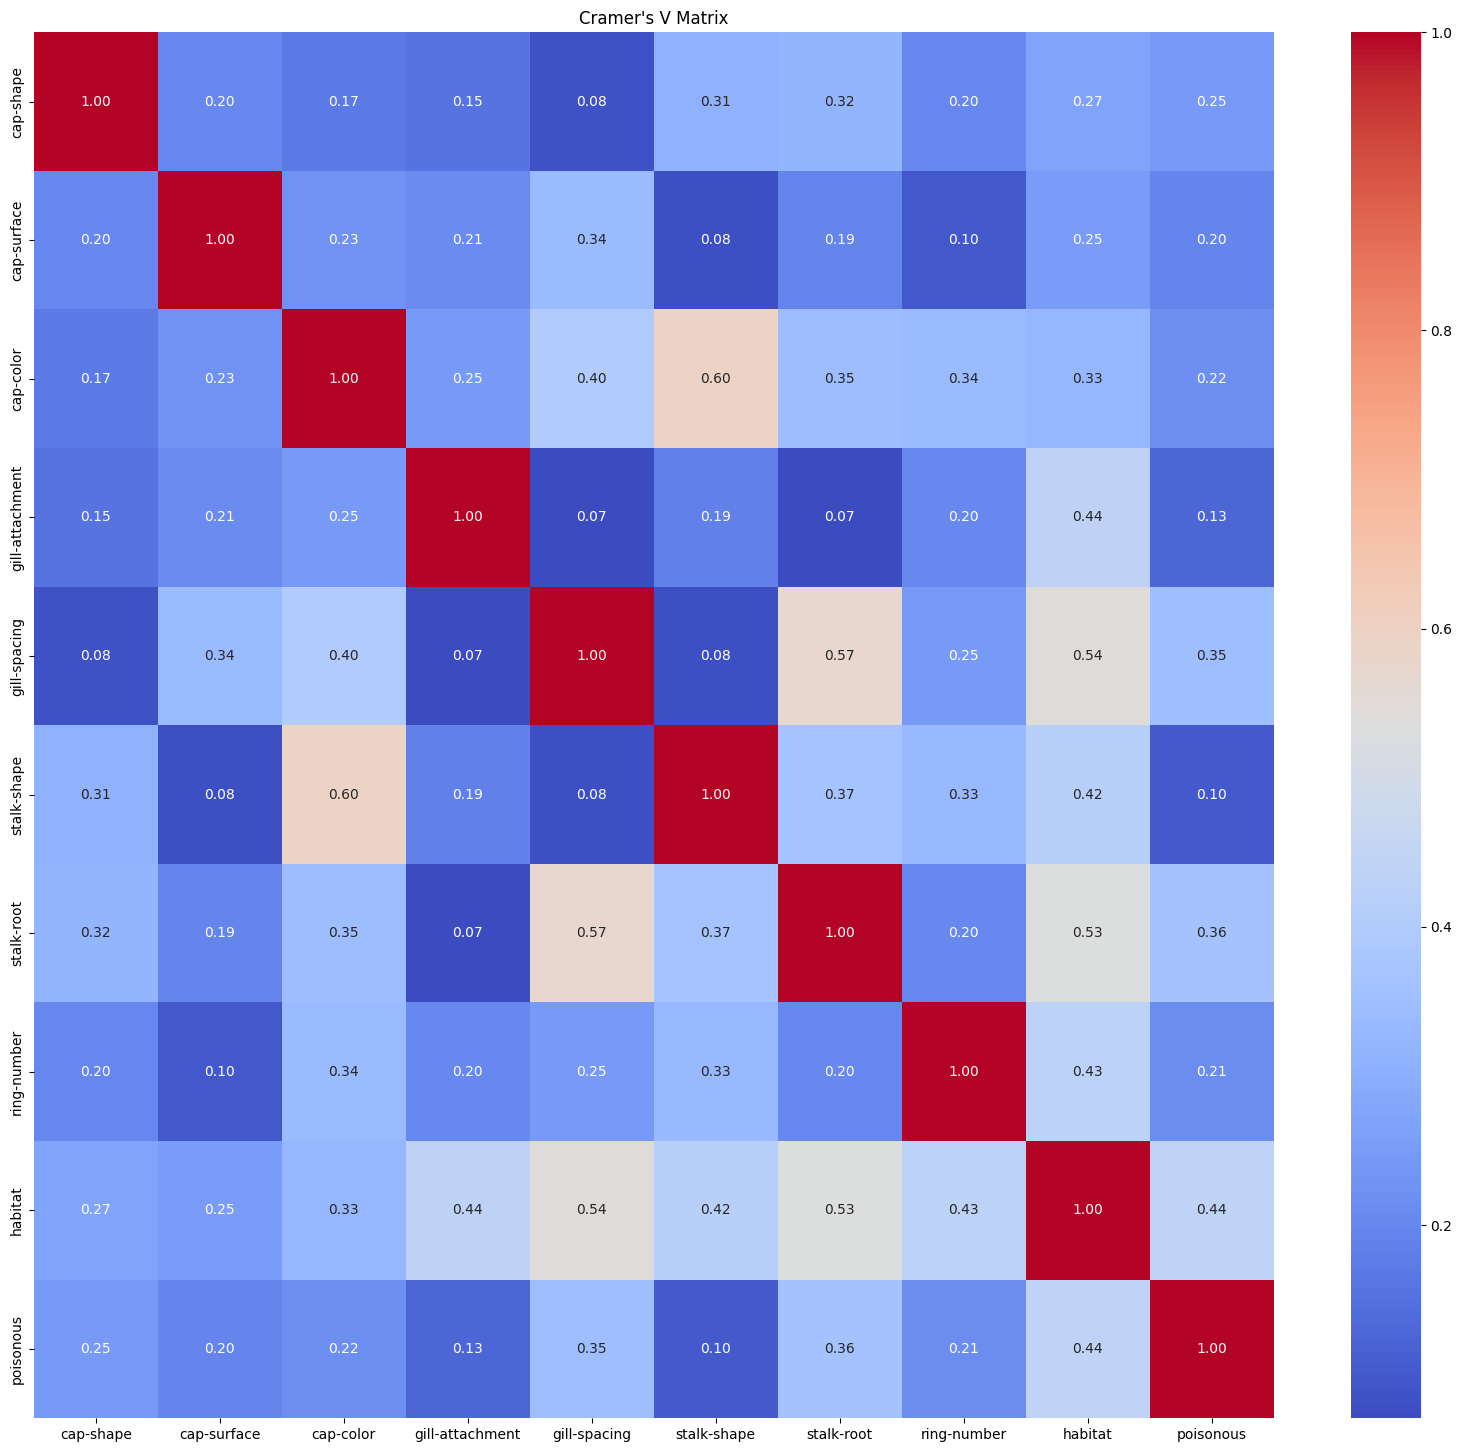

In [617]:
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    if n == 0 or min(r, k) == 1:
        return 0  # Return 0 if there is no data or if the table is degenerate
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))
    
features = df_mushrooms.columns

# Initialize Cramér's V matrix
cramers_v_matrix = pd.DataFrame(index=features, columns=features)

# Calculate Cramér's V for each pair of categorical features
for feature1 in features:
    for feature2 in features:
        confusion_matrix = pd.crosstab(df_mushrooms[feature1], df_mushrooms[feature2])
        cramers_v_matrix.loc[feature1, feature2] = cramers_v(confusion_matrix)

# Convert to float
cramers_v_matrix = cramers_v_matrix.astype(float)

# Plot the Cramér's V matrix
plt.figure(figsize=(20, 18))
sns.heatmap(cramers_v_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Cramer\'s V Matrix')
plt.show()

# Modelling

In [619]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [620]:
df_dummies = pd.get_dummies(df_mushrooms.drop('poisonous', axis=1))

X = df_dummies
y = df_mushrooms['poisonous']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)

In [621]:
clf = DecisionTreeClassifier(random_state=89)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=89)

In [622]:
y_pred = clf.predict(X_test)

In [623]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", report)
print("\nConfusion Matrix:\n", conf_matrix)

Accuracy: 0.9770303527481542

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1245
           1       1.00      0.95      0.98      1193

    accuracy                           0.98      2438
   macro avg       0.98      0.98      0.98      2438
weighted avg       0.98      0.98      0.98      2438


Confusion Matrix:
 [[1245    0]
 [  56 1137]]
